 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
whale_returns_path = Path(r'./src/whale_returns.csv')
whale_returns_df = pd.read_csv(whale_returns_path, infer_datetime_format = True, parse_dates = True)

whale_returns_df['Date'] = pd.to_datetime(whale_returns_df['Date'])
whale_returns_df.set_index('Date', inplace = True)

whale_returns_df = whale_returns_df.sort_index()
whale_returns_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


In [3]:
# Count nulls
whale_returns_df.isnull()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,True,True,True,True
2015-03-03,False,False,False,False
2015-03-04,False,False,False,False
2015-03-05,False,False,False,False
2015-03-06,False,False,False,False
...,...,...,...,...
2019-04-25,False,False,False,False
2019-04-26,False,False,False,False
2019-04-29,False,False,False,False


In [4]:
# Drop nulls
whale_returns_df = whale_returns_df.dropna().copy()
whale_returns_df.isnull()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,False,False,False,False
2015-03-04,False,False,False,False
2015-03-05,False,False,False,False
2015-03-06,False,False,False,False
2015-03-09,False,False,False,False
...,...,...,...,...
2019-04-25,False,False,False,False
2019-04-26,False,False,False,False
2019-04-29,False,False,False,False


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [5]:
# Reading algorithmic returns
algo_returns_path = Path(r'./src/algo_returns.csv')
algo_returns_df = pd.read_csv(algo_returns_path, index_col = "Date", infer_datetime_format = True, parse_dates = True)

algo_returns_df = algo_returns_df.sort_index()

algo_returns_df

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


In [6]:
# Count nulls
algo_returns_df.isna()

,Algo 1,Algo 2
Date,,
2014-05-28,False,True
2014-05-29,False,True
2014-05-30,False,True
2014-06-02,False,True
2014-06-03,False,True
...,...,...
2019-04-25,False,False
2019-04-26,False,False
2019-04-29,False,False


In [7]:
# Drop nulls
algo_returns_df = algo_returns_df.dropna().copy()
algo_returns_df

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [8]:
# Reading S&P 500 Closing Prices
SP500_path = Path(r'./src/sp500_history.csv')
SP500_df = pd.read_csv(SP500_path, index_col = 'Date', infer_datetime_format = True, parse_dates =True)


#SP500_df['Date'] = pd.to_datetime(SP500_df['Date'])
#SP500_df.set_index('Date', inplace = True)

SP500_df = SP500_df.sort_index()
SP500_df

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93
...,...
2019-04-16,$2907.06
2019-04-17,$2900.45
2019-04-18,$2905.03


In [9]:
# Check Data Types
SP500_df.dtypes

Close    object
dtype: object

In [10]:
# Fix Data Types

SP500_df.to_string('Close')
SP500_df['Close'] = SP500_df['Close'].str.replace('$', '')
SP500_df['Close'] = pd.to_numeric(SP500_df['Close'])

SP500_df.head()
SP500_df.dtypes

Close    float64
dtype: object

In [11]:
# Calculate Daily Returns
SP500_df['Close'] = SP500_df['Close'].pct_change()

In [12]:
# Drop nulls
SP500_df = SP500_df.dropna().copy()
SP500_df.head()

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [13]:
# Rename `Close` Column to be specific to this portfolio.
SP500_df = SP500_df.rename(columns = {'Close': 'S&P500'})

SP500_df

,S&P500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457
...,...
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579


## Combine Whale, Algorithmic, and S&P 500 Returns

In [14]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_df = pd.concat([whale_returns_df, algo_returns_df, SP500_df], axis = 'columns', join = 'inner')

combined_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

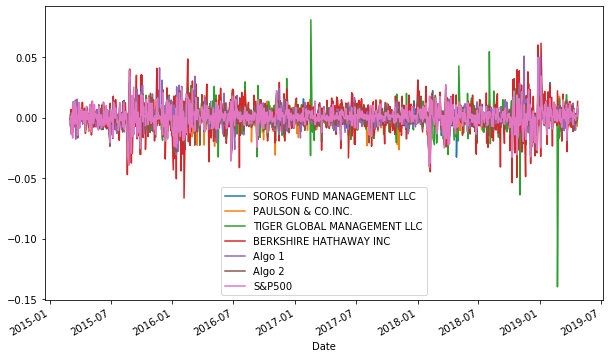

In [15]:
# Plot daily returns of all portfolios
combined_df.plot(figsize = (10,6))

#### Calculate and Plot cumulative returns.

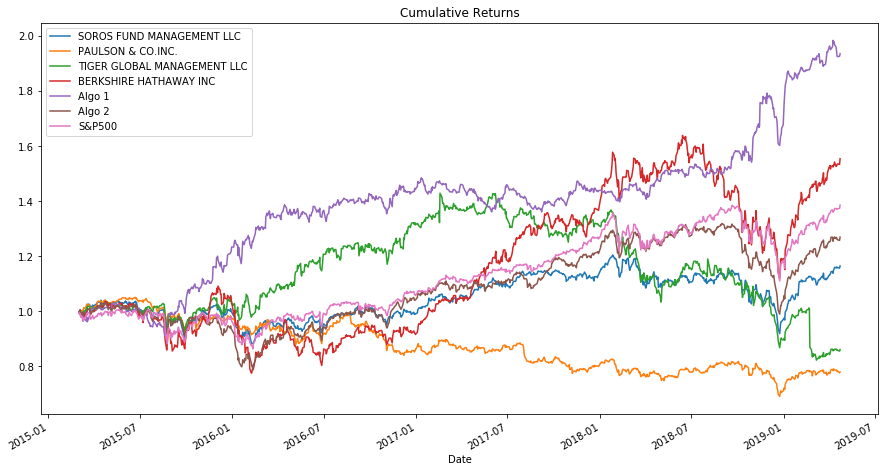

In [16]:
# Calculate cumulative returns of all portfolios

cumulative_returns_df = (1 + combined_df).cumprod() 

cumulative_returns_df.plot(figsize = (15, 8), title = "Cumulative Returns") 

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


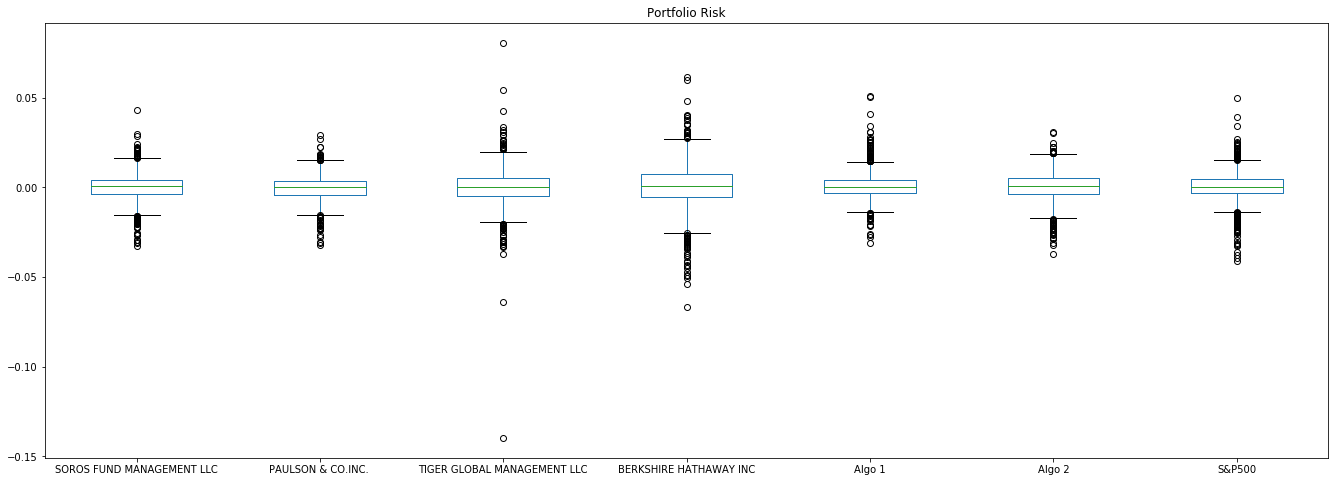

In [17]:
# Box plot to visually show risk
#df = [whale_returns_df, algo_returns_df, SP500_returns_df]
#df = pd.concat(df)
#Standard Deviation 

combined_df.plot.box(figsize = (23, 8), title = 'Portfolio Risk')
#Annualized Standard Deviation
combined_df_std = combined_df.std()
combined_df_std_annual = combined_df.std() * np.sqrt(252)



### Calculate the Annualized Standard Deviation

In [18]:
#Annualized Standard Deviation
combined_df_std = combined_df.std()
combined_df_std_annual = combined_df.std() * np.sqrt(252)

### Calculate Standard Deviations

In [19]:
# Calculate the daily standard deviations of all portfolios
combined_df_std = combined_df.std() 
combined_df_std.sort_values(inplace = True)

combined_df_std 

PAULSON & CO.INC.              0.007023
Algo 1                         0.007620
SOROS FUND MANAGEMENT LLC      0.007895
Algo 2                         0.008342
S&P500                         0.008554
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
dtype: float64

### Determine which portfolios are riskier than the S&P 500

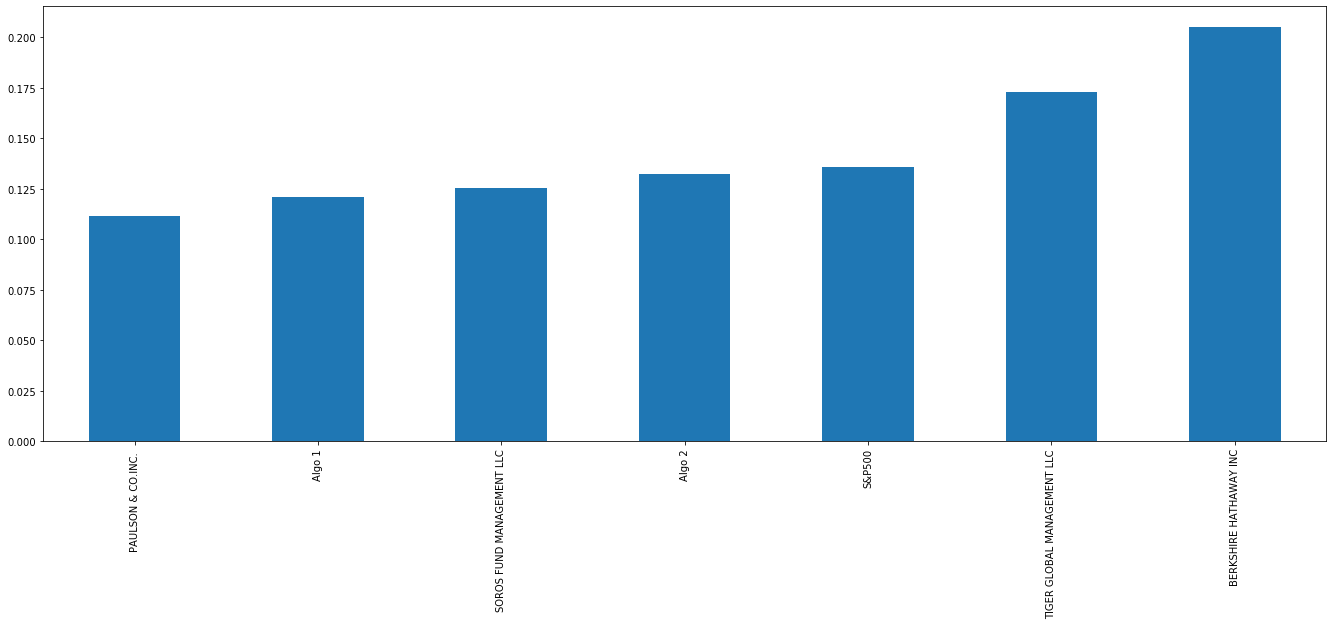

In [20]:
# Calculate  the daily standard deviation of S&P 500
SP500_df_std_annual = SP500_df.std() * np.sqrt(252)
# Determine which portfolios are riskier than the S&P 500

combined_df_std_annual.sort_values(inplace = True)

combined_df_std_annual.plot.bar(figsize = (23, 8))

### Which Portfolios are Riskier than the S&P 500? 

- Tiger Global Manangement LLC 
- Berkshire Hathaway Inc 

### Calculate the Annualized Standard Deviation

In [21]:
# Calculate the annualized standard deviation (252 trading days)

combined_df_std_annual = combined_df.std() * np.sqrt(252)

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P 500 using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

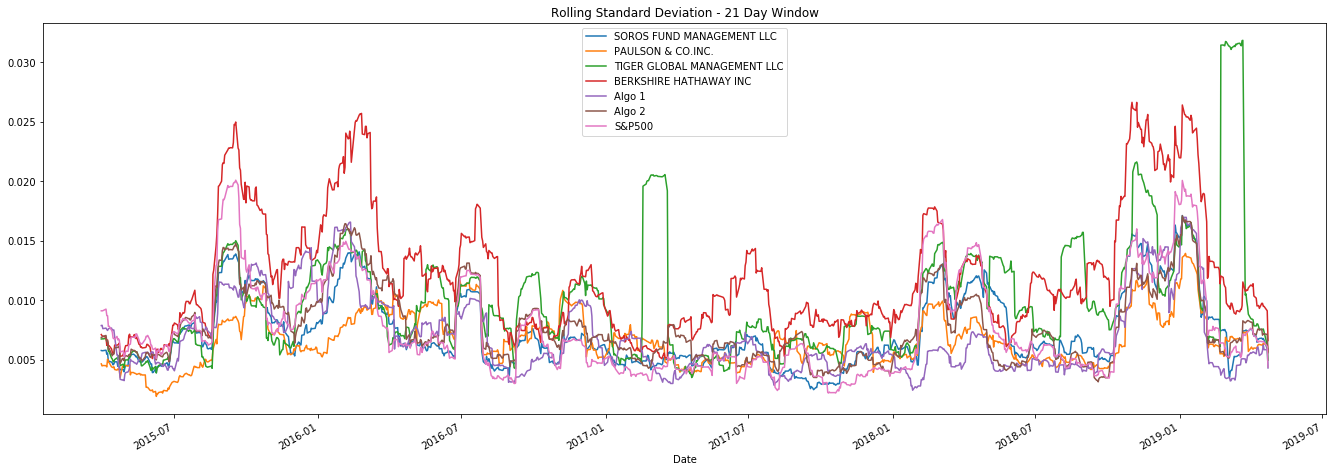

In [22]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
combined_std_rolling = combined_df.rolling(window = 21).std()
# Plot the rolling standard deviation
combined_std_rolling.plot(figsize = (23, 8), title = 'Rolling Standard Deviation - 21 Day Window')

### Calculate and plot the correlation

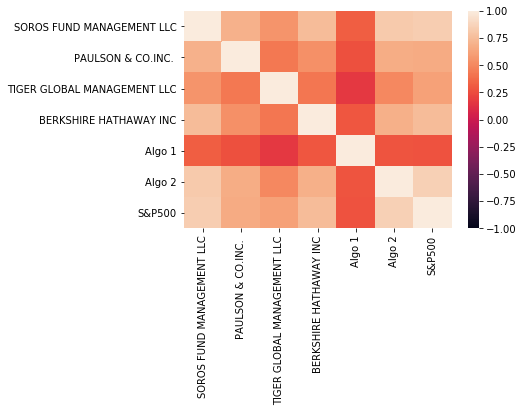

In [23]:
# Calculate the correlation
combined_df.corr()
# Display de correlation matrix
#!pip install seaborn 
import seaborn as sns
sns.heatmap(combined_df.corr(), vmin = -1, vmax = 1)

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

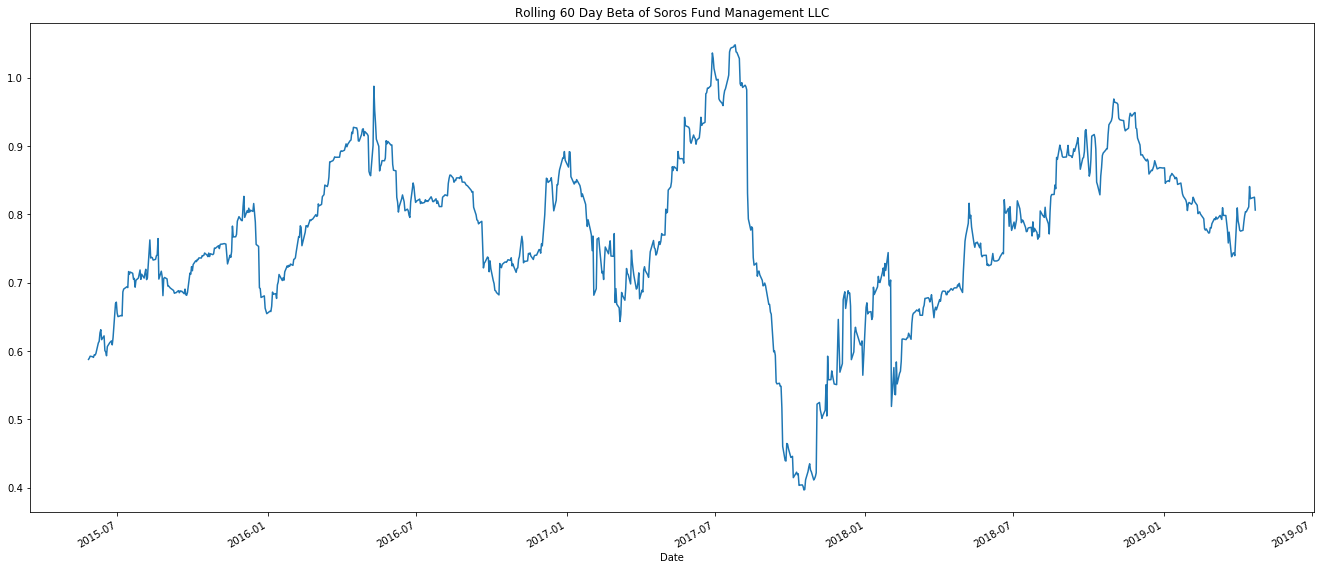

In [24]:
# Calculate covariance of a single portfolio
covariance = combined_df['SOROS FUND MANAGEMENT LLC'].rolling(window = 60).cov(combined_df['S&P500'])

# Calculate variance of S&P 500
variance = combined_df['S&P500'].rolling(window = 60).var()
# Computing beta
soros_beta =  covariance/variance 

# Plot beta trend
soros_beta.plot(figsize = (23, 10), title = 'Rolling 60 Day Beta of Soros Fund Management LLC')

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

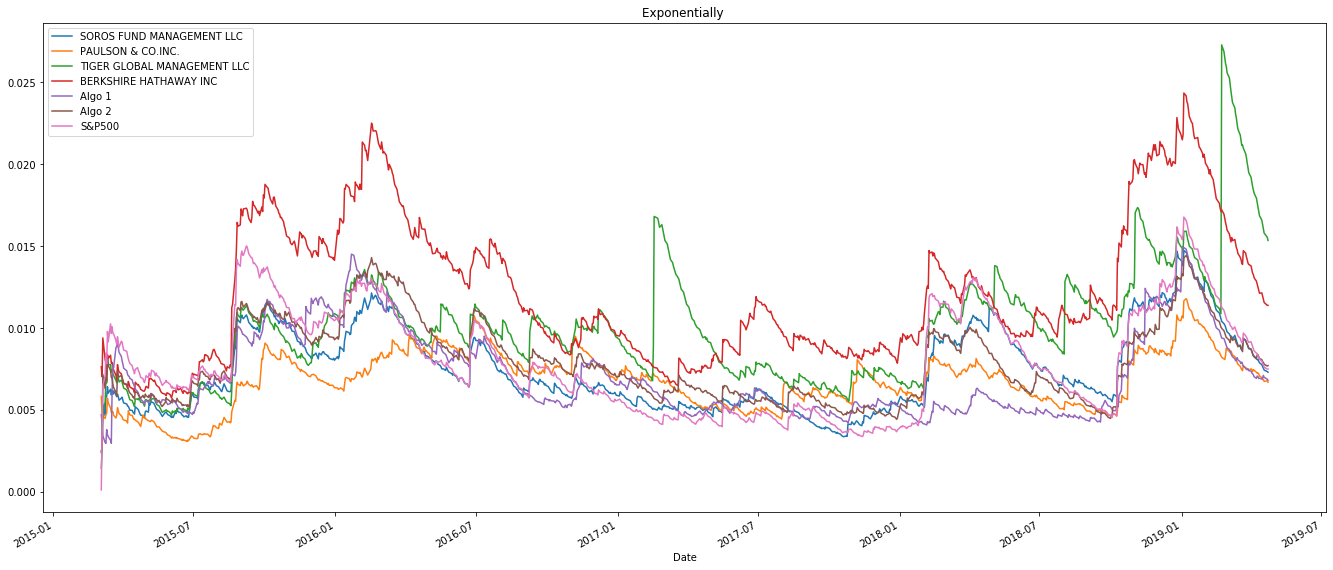

In [25]:
# Use `ewm` to calculate the rolling window
rolling_beta_ewm = combined_df.ewm(halflife = 21).std().plot(figsize = (23, 10), title = "Exponentially ")

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [26]:
# Annualized Sharpe Ratios
sharpe_ratio = (combined_df.mean() * 252) / (combined_df.std() * np.sqrt(252))
sharpe_ratio

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
S&P500                         0.648267
dtype: float64

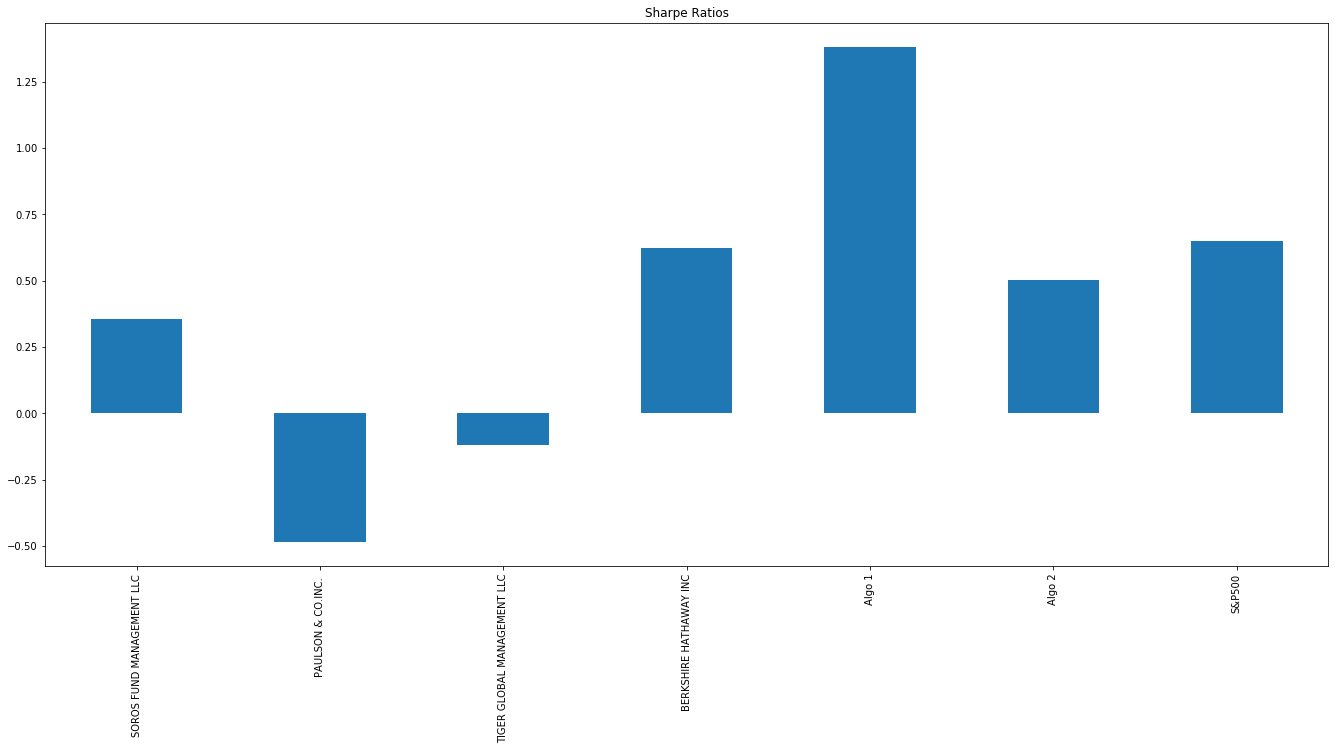

In [27]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratio.plot.bar(figsize = (23, 10), title = 'Sharpe Ratios')

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

Plotting the Sharpe Ratios for the fund portfolios, algoro trading, and the S&P 500, Algo 1 outperfomed all of the combined portfolios on a risk-adjusted basis. Algo 2 did not perform as well as Algo 1 and did not outperform the S&P 500, it did out perform all of the professional funds except Berkshire Hathaway. 

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [28]:
# Reading data from 1st stock
my_portfolio = pd.read_csv(r'./src/portfolio_test.csv', infer_datetime_format = True, parse_dates = True) 
my_portfolio['Date'] = pd.to_datetime(my_portfolio['Date'])

my_portfolio['Date'] = my_portfolio['Date'].dt.date

my_portfolio.head()

,Date,AT,INTC,LMT,XOM,AAPL
0,2016-01-04,1.91,33.99,213.21,77.46,26.34
1,2016-01-05,1.97,33.83,218.26,78.12,25.68
2,2016-01-06,1.96,33.08,217.63,77.47,25.18
3,2016-01-07,1.82,31.84,213.29,76.23,24.11
4,2016-01-08,1.75,31.51,212.91,74.69,24.24


In [29]:
#Reading data from 1st stock 
at_stock = my_portfolio[['Date', 'AT']].set_index("Date").dropna().copy()
at_stock.head()

,AT
Date,
2016-01-04,1.91
2016-01-05,1.97
2016-01-06,1.96
2016-01-07,1.82
2016-01-08,1.75


In [30]:
# Reading data from 2nd stock
intc_stock = my_portfolio[['Date', 'INTC']].set_index("Date").dropna().copy()
intc_stock.head()

,INTC
Date,
2016-01-04,33.99
2016-01-05,33.83
2016-01-06,33.08
2016-01-07,31.84
2016-01-08,31.51


In [31]:
# Reading data from 3rd stock
lmt_stock = my_portfolio[['Date', 'LMT']].set_index("Date").dropna().copy()
lmt_stock.head()

,LMT
Date,
2016-01-04,213.21
2016-01-05,218.26
2016-01-06,217.63
2016-01-07,213.29
2016-01-08,212.91


In [32]:
# Reading data from 4th stock 
xom_stock = my_portfolio[['Date', 'XOM']].set_index('Date').dropna().copy()
xom_stock.head()

,XOM
Date,
2016-01-04,77.46
2016-01-05,78.12
2016-01-06,77.47
2016-01-07,76.23
2016-01-08,74.69


In [33]:
# Reading data from 5th stock 
aapl_stock = my_portfolio[['Date', 'AAPL']].set_index('Date').dropna().copy()
aapl_stock.head()

,AAPL
Date,
2016-01-04,26.34
2016-01-05,25.68
2016-01-06,25.18
2016-01-07,24.11
2016-01-08,24.24


In [34]:
# Combine all stocks in a single DataFrame
portfolio_combined = my_portfolio.set_index('Date')
portfolio_combined

,AT,INTC,LMT,XOM,AAPL
Date,,,,,
2016-01-04,1.91,33.99,213.21,77.46,26.34
2016-01-05,1.97,33.83,218.26,78.12,25.68
2016-01-06,1.96,33.08,217.63,77.47,25.18
2016-01-07,1.82,31.84,213.29,76.23,24.11
2016-01-08,1.75,31.51,212.91,74.69,24.24
...,...,...,...,...,...
2019-12-23,2.36,59.23,NaN,70.29,71.00
2019-12-24,2.35,59.41,NaN,70.02,71.07
2019-12-26,2.35,59.82,NaN,70.13,72.48


In [35]:
# Reset Date index
portfolio_combined_reset = portfolio_combined.reset_index()
portfolio_combined_reset

,Date,AT,INTC,LMT,XOM,AAPL
0,2016-01-04,1.91,33.99,213.21,77.46,26.34
1,2016-01-05,1.97,33.83,218.26,78.12,25.68
2,2016-01-06,1.96,33.08,217.63,77.47,25.18
3,2016-01-07,1.82,31.84,213.29,76.23,24.11
4,2016-01-08,1.75,31.51,212.91,74.69,24.24
...,...,...,...,...,...,...
1000,2019-12-23,2.36,59.23,NaN,70.29,71.00
1001,2019-12-24,2.35,59.41,NaN,70.02,71.07
1002,2019-12-26,2.35,59.82,NaN,70.13,72.48
1003,2019-12-27,2.34,60.08,NaN,69.89,72.45


In [36]:
# Reorganize portfolio data by having a column per symbol
portfolio_combined_1 = portfolio_combined_reset.pivot_table(values = ['AT', 'INTC', 'LMT', 'XOM', 'AAPL'], index = 'Date')
portfolio_combined_1

,AAPL,AT,INTC,LMT,XOM
Date,,,,,
2016-01-04,26.34,1.91,33.99,213.21,77.46
2016-01-05,25.68,1.97,33.83,218.26,78.12
2016-01-06,25.18,1.96,33.08,217.63,77.47
2016-01-07,24.11,1.82,31.84,213.29,76.23
2016-01-08,24.24,1.75,31.51,212.91,74.69
...,...,...,...,...,...
2019-12-23,71.00,2.36,59.23,NaN,70.29
2019-12-24,71.07,2.35,59.41,NaN,70.02
2019-12-26,72.48,2.35,59.82,NaN,70.13


In [37]:
# Calculate daily returns
portfolio_combined_dret = portfolio_combined.pct_change()
# Drop NAs
portfolio_combined_dret = portfolio_combined_dret.dropna().copy()
# Display sample data
portfolio_combined_dret.head()

,AT,INTC,LMT,XOM,AAPL
Date,,,,,
2016-01-05,0.031414,-0.004707,0.023686,0.008521,-0.025057
2016-01-06,-0.005076,-0.022170,-0.002886,-0.008321,-0.019470
2016-01-07,-0.071429,-0.037485,-0.019942,-0.016006,-0.042494
2016-01-08,-0.038462,-0.010364,-0.001782,-0.020202,0.005392
2016-01-11,-0.040000,0.017455,0.011460,-0.013389,0.016089


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [38]:
# Set weights
weights = [0.2, 0.2, 0.2, 0.2, 0.2]

# Calculate portfolio return
portfolio_combined_tret = portfolio_combined_dret.dot(weights) 
# Display sample data
portfolio_combined_tret.head()

Date
2016-01-05    0.006771
2016-01-06   -0.011585
2016-01-07   -0.037471
2016-01-08   -0.013084
2016-01-11   -0.001677
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [39]:
# Join your returns DataFrame to the original returns DataFrame
combined_df = pd.concat([combined_df, portfolio_combined_tret], axis = 1)
combined_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500,0
Date,,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539,NaN
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389,NaN
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196,NaN
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174,NaN
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944,NaN


In [40]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
returns = combined_df.dropna().copy()


returns = returns.rename(columns = {0 : 'My Portfolio'})
returns

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500,My Portfolio
Date,,,,,,,,
2016-01-05,-0.000398,0.002242,0.006798,-0.002960,0.009160,0.001770,0.002012,0.006771
2016-01-06,-0.011558,-0.006955,-0.003349,0.017758,0.010346,-0.015503,-0.013115,-0.011585
2016-01-07,-0.020495,-0.007167,-0.021324,-0.033944,-0.000081,-0.029061,-0.023700,-0.037471
2016-01-08,-0.008149,-0.008307,-0.010071,-0.017585,-0.006897,-0.012941,-0.010838,-0.013084
2016-01-11,-0.005272,-0.001480,0.011699,-0.003927,-0.007627,-0.018451,0.000853,-0.001677
...,...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509,0.002930
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274,0.007068
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579,0.003911


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [41]:
# Calculate the annualized `std`
annualized_std = combined_df.std() * np.sqrt(252)
annualized_std

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
S&P500                         0.135786
0                              0.158496
dtype: float64

### Calculate and plot rolling `std` with 21-day window

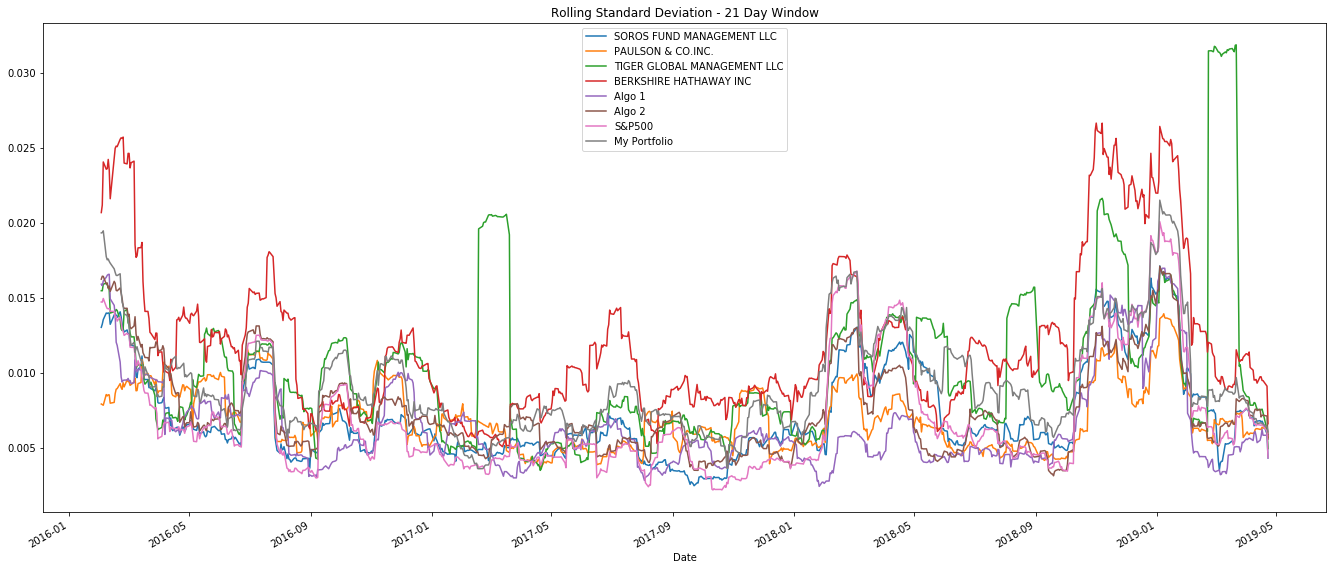

In [42]:
# Calculate rolling standard deviation
rolling_std_dev = returns.rolling(window = 21).std()
# Plot rolling standard deviation
rolling_std_dev.plot(figsize = (23, 10), title = 'Rolling Standard Deviation - 21 Day Window')

### Calculate and plot the correlation

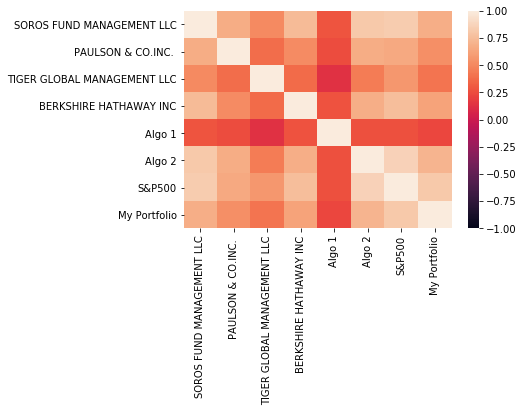

In [43]:
# Calculate and plot the correlation
correlation = returns.corr()


sns.heatmap(correlation, vmin = -1, vmax = 1)

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

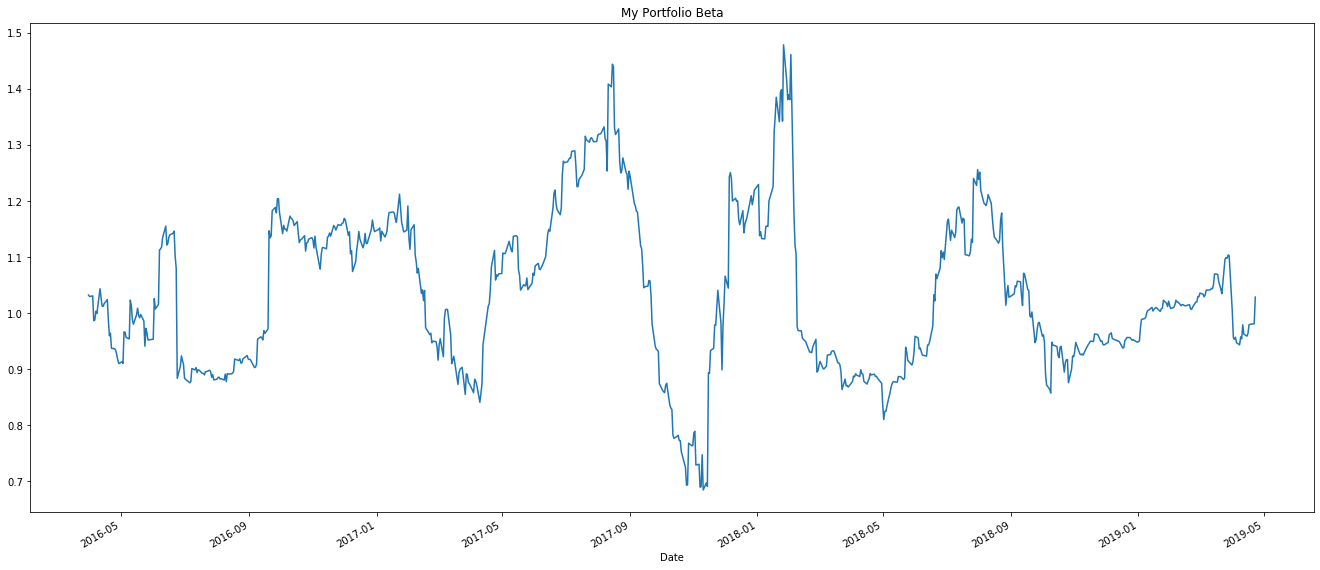

In [44]:
# Calculate and plot Beta
covariance = returns['My Portfolio'].rolling(window = 60).cov(returns['S&P500'])
variance = returns['S&P500'].rolling(60).var()

beta = covariance/variance 

beta.plot(figsize = (23, 10), title = "My Portfolio Beta")

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [45]:
# Calculate Annualzied Sharpe Ratios
sharpe_ratios = (returns.mean()*252) / (returns.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.471964
PAULSON & CO.INC.             -0.517669
TIGER GLOBAL MANAGEMENT LLC   -0.192931
BERKSHIRE HATHAWAY INC         0.770941
Algo 1                         1.244566
Algo 2                         0.809963
S&P500                         0.948935
My Portfolio                   0.938965
dtype: float64

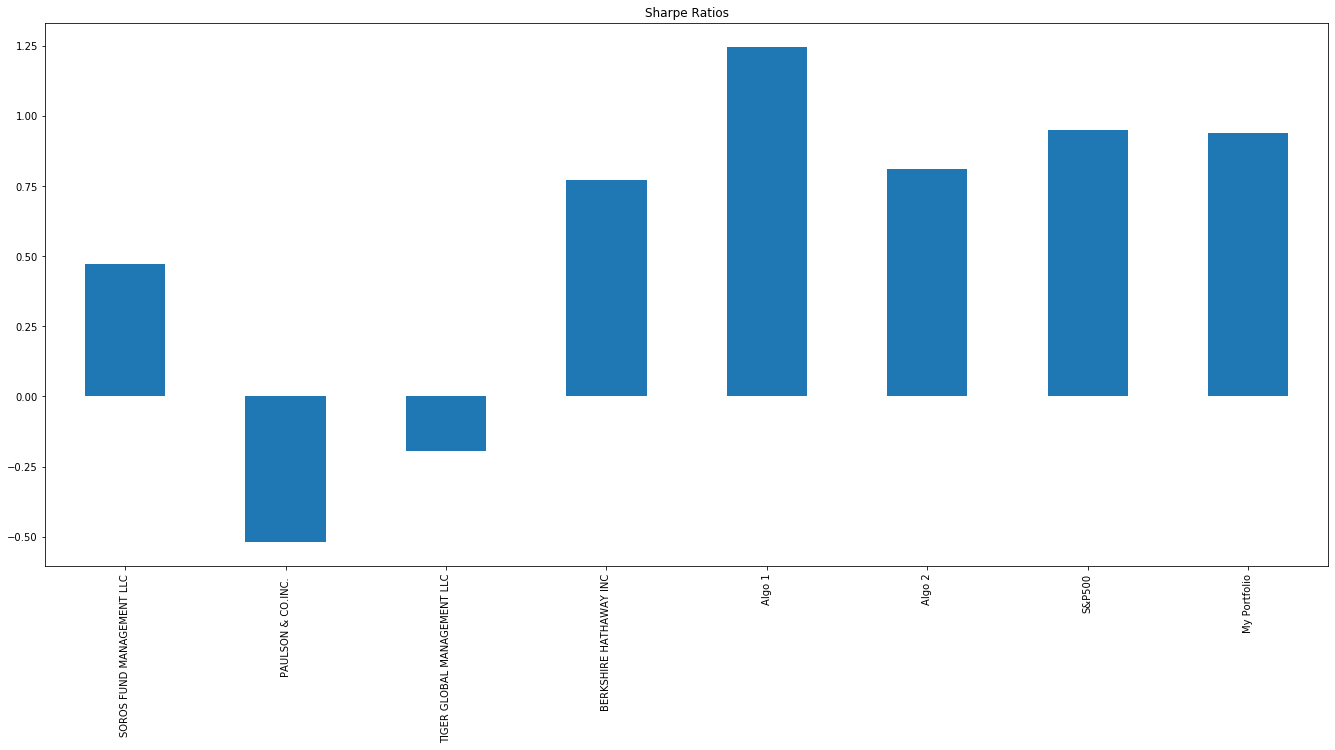

In [46]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot.bar(figsize = (23, 10), title = 'Sharpe Ratios')

### How does your portfolio do?

Write your answer here!

My portfolio does slightly worse than the S&P 500 on a risk-adjusted basis but performs better than all of the professional funds. 